In [1]:
import numpy as np
import pandas as pd

In [2]:
X_train = pd.read_csv("X_train.csv").set_index('enrollee_id')
Y_train = pd.read_csv("Y_train.csv").set_index('enrollee_id').values.flatten()
X_test = pd.read_csv("X_test.csv").set_index('enrollee_id')
Y_test = pd.read_csv("Y_test.csv").set_index('enrollee_id').values.flatten()

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib import pyplot

In [5]:
def training(X_train, X_test, y_train, y_test, model): 
    # training process
    model.fit(X_train, y_train)
    
    # testing
    y_pred = model.predict_proba(X_test)[:,1]
    y_pred_train = model.predict_proba(X_train)[:,1]
    #print(y_test.to_numpy())
    #print(y_pred)
    
    test_score = metrics.roc_auc_score(y_test, y_pred)
    train_score = metrics.roc_auc_score(y_train, y_pred_train)
    return {'test_score':test_score, 'train_score':train_score}

# Tunning Model

In [9]:
param = []

for n_neighbors in (3,5,10,20):
    for weights in ('uniform', 'distance'):
        for p in range (1,4):
            model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p, n_jobs=-1)
            result = training(X_train, X_test, Y_train, Y_test, model)
            print(n_neighbors,weights, p)
            print(result['test_score'])
            print(result['train_score'])
            print()
            param.append((result['test_score'],result['train_score'],n_neighbors,weights, p))

3 uniform 1
0.6249511620917653
0.8831640804207583

3 uniform 2
0.5931122448979592
0.879322695035704

3 uniform 3
0.5874318416005953
0.8781508096756978

3 distance 1
0.6208058433752182
0.9999944146984304

3 distance 2
0.5883096716947649
0.9999944146984303

3 distance 3
0.5826339196267568
0.9999944146984304

5 uniform 1
0.6380688811288892
0.8380242442293155

5 uniform 2
0.6101792154449437
0.8330643365291082

5 uniform 3
0.598600158857372
0.8311562878628336

5 distance 1
0.634945759509975
0.9999944146984304

5 distance 2
0.6049608938947247
0.9999944146984303

5 distance 3
0.5937113590176604
0.9999944146984304

10 uniform 1
0.6484051650113061
0.7902331601844159

10 uniform 2
0.6268853579299882
0.774812016909963

10 uniform 3
0.6120196711223059
0.7694662208385294

10 distance 1
0.6449909837707875
0.9999944146984304

10 distance 2
0.6211079943899017
0.9999944146984303

10 distance 3
0.6078979663394111
0.9999944146984304

20 uniform 1
0.6670698328419726
0.7591542578741273

20 uniform 2
0.6314

In [10]:
param.sort()
param[::-1]

[(0.6670698328419726, 0.7591542578741273, 20, 'uniform', 1),
 (0.6606498840770529, 0.9999944146984304, 20, 'distance', 1),
 (0.6484051650113061, 0.7902331601844159, 10, 'uniform', 1),
 (0.6449909837707875, 0.9999944146984304, 10, 'distance', 1),
 (0.6380688811288892, 0.8380242442293155, 5, 'uniform', 1),
 (0.634945759509975, 0.9999944146984304, 5, 'distance', 1),
 (0.6314519706900993, 0.7305452924211477, 20, 'uniform', 2),
 (0.6280004007212983, 0.9999944146984303, 20, 'distance', 2),
 (0.6268853579299882, 0.774812016909963, 10, 'uniform', 2),
 (0.6249511620917653, 0.8831640804207583, 3, 'uniform', 1),
 (0.6211079943899017, 0.9999944146984303, 10, 'distance', 2),
 (0.6208058433752182, 0.9999944146984304, 3, 'distance', 1),
 (0.6166721527320606, 0.7208339378365758, 20, 'uniform', 3),
 (0.6140647808913187, 0.9999944146984304, 20, 'distance', 3),
 (0.6120196711223059, 0.7694662208385294, 10, 'uniform', 3),
 (0.6101792154449437, 0.8330643365291082, 5, 'uniform', 2),
 (0.6078979663394111, 0.

# Importance feature

In [13]:
model = KNeighborsClassifier(n_neighbors=20, weights='uniform', p=1, n_jobs=-1)
result = training(X_train, X_test, Y_train, Y_test, model)
print('test_score: ',result['test_score'])     
print('train_score: ',result['train_score'])

test_score:  0.6670698328419726
train_score:  0.7591542578741273


# Scoring Model

In [14]:
test_df = pd.read_csv('test_processed.csv').set_index('enrollee_id')
predict = model.predict_proba(test_df)[:,1]
target_values = np.load("jobchange_test_target_values.npy")
score = metrics.roc_auc_score(target_values,predict)
print("AUC Score: ",score)

AUC Score:  0.6619457412177148


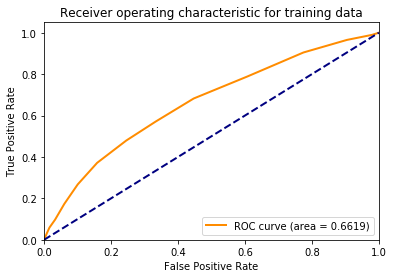

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(target_values, predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.show()